<h1><center> Coronavirus Prediction</center> </h1>

In [129]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from scipy.optimize import curve_fit
#from datetime import datetime
%matplotlib inline

# Importing the data

In [130]:
cov19_df=pd.read_csv('time_series_19-covid-Confirmed_20200308.csv')

In [131]:
cov19_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,411,413,414,414,418,418,422,426,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,102,119,120,124


# Preprocessing

In [132]:
cov19_df.drop(columns=['Province/State'],inplace=True);

Let's drop Province/State as we won't use it

In [133]:
cov19_df.rename(columns={'Country/Region':'Country'},inplace=True)
cov19_df.replace(to_replace='Mainland China',value='China',inplace=True)
cov19_df['Country'].unique()

array(['China', 'Thailand', 'Japan', 'South Korea', 'Taiwan', 'US',
       'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France', 'Nepal',
       'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka',
       'Germany', 'Finland', 'United Arab Emirates', 'Philippines',
       'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium',
       'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus',
       'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco',
       'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jord

Checking if the list of countries is consistent. It looks fine. Just it could be worth it to label 'French Guiana' and 'Martinique' as 'France'

In [134]:
cov19_df_t=cov19_df.transpose()
cov19_df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
Country,China,China,China,China,China,China,China,China,China,China,...,US,US,US,US,US,US,US,US,US,US
Lat,31.8257,40.1824,30.0572,26.0789,36.0611,23.3417,23.8298,26.8154,19.1959,38.0428,...,34.0132,33.9533,35.1269,47.6587,38.6103,40.9849,41.8586,44.3378,42.4072,29.028
Long,117.226,116.414,107.874,117.987,103.834,113.424,108.788,106.875,109.745,114.515,...,-85.1479,-117.396,-89.9253,-117.422,-90.4125,-72.6151,-74.3118,-72.7563,-71.3824,-81.0755
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1/23/20,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0


Transposing the data to have the data as rows. We won't each row to represent the new cases for a given country for a given day

In [135]:
cov19_df=cov19_df.groupby('Country').sum()
cov19_df.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,4
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,1,1,1,3,5,12,12,17,17,19
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,8,12
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


Previously, for a given day, we had multiple entries for a given Country due to the fact that we had the split per Province/state earlier.

In [136]:
position_df=cov19_df[['Lat','Long']]
position_df.head()

,Lat,Long
Country,,
Afghanistan,33.0000,65.0000
Algeria,28.0339,1.6596
Andorra,42.5063,1.5218
Argentina,-38.4161,-63.6167
Armenia,40.0691,45.0382


Storing the coordinates of the countries that might be useful later on

In [137]:
cov19_df.drop(columns=['Lat','Long'],inplace=True)
cov19_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,4
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,1,3,5,12,12,17,17,19
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,8,12
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


In [138]:
cov19_df_t=cov19_df.transpose()
cov19_df_t.head()

Country,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
1/22/20,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,1,0,0,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,...,3,5,0,0,0,2,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,2,0,0,0,2
1/26/20,0,0,0,0,0,4,0,0,0,0,...,4,8,0,0,0,5,0,0,0,2


In [139]:
cov19_df_source=cov19_df
cov19_df=cov19_df_t
cov19_df.head()

Country,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
1/22/20,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,1,0,0,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,...,3,5,0,0,0,2,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,2,0,0,0,2
1/26/20,0,0,0,0,0,4,0,0,0,0,...,4,8,0,0,0,5,0,0,0,2


Renamming cov19_df_t as cov19_df as it is easier to type ;) but I still want to have both version available (transposed and not transposed)

In [140]:
cov19_df.reset_index(inplace=True)
cov19_df.rename(columns={'index':'Date'},inplace=True)
cov19_df.set_index('Date',inplace=True)
#cov19_df.drop(columns='level_0',inplace=True)
cov19_df.head()


Country,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,1,0,0,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,...,3,5,0,0,0,2,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,2,0,0,0,2
1/26/20,0,0,0,0,0,4,0,0,0,0,...,4,8,0,0,0,5,0,0,0,2


In [141]:
cov19_df.index=pd.DatetimeIndex(cov19_df.index)
type(cov19_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Exploratory Visualization

In [142]:
cov19_df['France'].tail(10)

Date
2020-02-28      57
2020-02-29     100
2020-03-01     130
2020-03-02     191
2020-03-03     204
2020-03-04     285
2020-03-05     377
2020-03-06     653
2020-03-07     949
2020-03-08    1126
Name: France, dtype: int64

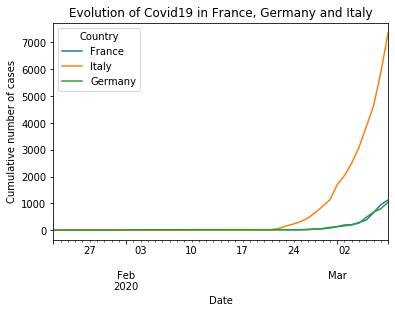

In [143]:
ax=cov19_df.plot(y=['France','Italy','Germany'])
ax.set_title('Evolution of Covid19 in France, Germany and Italy')
ax.set_ylabel('Cumulative number of cases')
ax

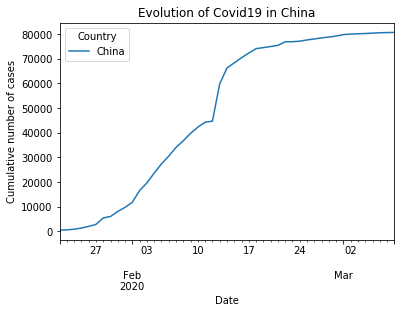

In [144]:
ax2=cov19_df.plot(y=['China'])
ax2.set_title('Evolution of Covid19 in China')
ax2.set_ylabel('Cumulative number of cases')
ax2

The dataset actually contains by default a cumulative view. Let's build the daily number of cases dataframe

In [145]:
cov19_cumul_df=cov19_df
rows=cov19_df.shape[0]
for column in cov19_df.columns :
    for i in range (1,rows):
        cov19_df[column][i]=cov19_df[column][i]-cov19_df[column][i-1]
cov19_df.head()

Country,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Taiwan,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,3,4,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,2
2020-01-26,0,0,0,0,0,4,0,0,0,0,...,4,5,0,0,0,5,0,0,0,0


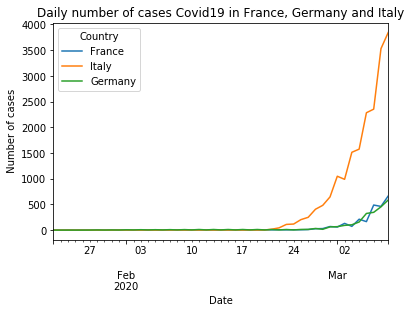

In [146]:
ax3=cov19_df.plot(y=['France','Italy','Germany'])
ax3.set_title('Daily number of cases Covid19 in France, Germany and Italy')
ax3.set_ylabel(' Number of cases')
ax3

Let's zoom on the last 7 days for France and Germany

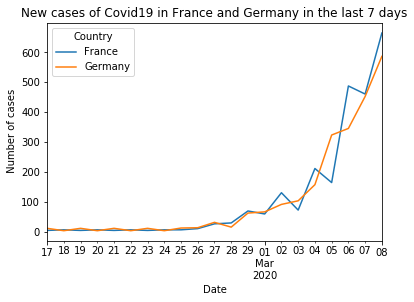

In [160]:
window=21
zoom=cov19_df.tail(window)
ax4=zoom.plot(y=['France','Germany'])
ax4.set_title('New cases of Covid19 in France and Germany in the last 7 days')
ax4.set_ylabel(' Number of cases')
ax4

# Modeling

In [149]:
window=cov19_df[['France','Germany']].tail(14)

In [150]:
y_train=window[window.shape[0]-14:window.shape[0]-7]
y_test=window[window.shape[0]-7+1:window.shape[0]]

In [154]:
from sklearn import linear_model
LR_f=sk.linear_model.LinearRegression()
LR_g=sk.linear_model.LinearRegression()
x_train = np.linspace(1,7,7).reshape(1,-1)
y_train_f = np.asanyarray(y_train[['France']]).reshape(1,-1)
y_train_g = np.asanyarray(y_train[['Germany']]).reshape(1,-1)
LR_f.fit(x_train,y_train_f)
LR_g.fit(x_train,y_train_g)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)